# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Oct 9 (Friday) 11:00 pm </b> </font>

<font color="blue"> Ashesh Shahi </font>

# Introduction

The objective of this assignment is to implement Least Squares and Least Mean Squares methods. But before start implementing those methods, First I am loading the data which is the same as used for Regression in assignment 0.After that I'll play with data by using the "info", "shape","describe" and "Corr" function. After that I performed the Visualization of target feature and other features using "Matplotlib" and "Seaborn".I also showed the correlation between different features by using "scatter matrix" and heatmap.Moving forward I performed the preprocessing on data by first spliting the data into train and test data, then , dropped few columns which are not important,filled the missing values and performed one hot encoding on both train and test data.After that I'll implement the "Least Sqaure" and "Least Mean Square" method by defining one super class and two separate classes for LS and LMS methods respectively. I defined two methods inside the LS and LMS classes namely train and use. First one is for training the LS and LMS methods, then testing it by use method. After implementing these methods I'll use the data to train and test both LS and LMS models and then compare both the methods respectively by using accuracy score and confusion matrix.

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Regression Data


#### Description

The data set which I am going to use for regression is picked from Kaggle, description of the dataset is listed below:<br>
Name of the Dataset- House Insurance Cross Sell Prediction<br>
You can download it from this link - https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction<br>
Related Aricles - This dataset is used in total seventy four projects. Names of few project are listed following:<br>
         1. Health INsurance Prediction Using TensorFlow
         2. Vehcile Insurance EDA and boosting models.
         3. Insurance interest prediction (TEST-AUC: 0.93)
         4. Insurance Response Prediction - EDA,XGBOOST

This data is of an insurance company who provides health insurance to the customers.Now, company is thinking about providing vehicle insurance to the customers.So, they want to predict whether the policy holder from past year will be interested in vehicle insurance.As we can see below in that there are 12 columns and around 400K rows in the dataset. The columns descriptions are listed below:-<br>
1 : id - unique id for every customer<br>
2: Gender - Gender of the customer<br>
3: Age - Age of the customer<br>
4: Driving_License - Customer who have driving license is represented by 1, 0 otherwise<br>
5: Region_Code - Unique region code of the customer<br>
6: Previously_Insured - Customer who previously have vehicle insurance is represented by 1, 0 otherwise<br>
7 : Vehicle_Age - Represents age of the vehicle<br>
8: Vehcile_Damage - Customer who got their vehicle damaged represented by 1, 0 otherwise<br>
9: Annual_Premium - The premium amount which customer have to pay per year<br>
10: Policy_Sales_Channel - Anonymized Code for the customer outreach channel ie. Various agents, over mail, over phone, In                                Person, etc.<br>
11: Vintage - Number of days, customer has been associated with the company<br>
12: Response - Customer who is interested in Vehicle Insurance represented by 1, 0 otherwise, This is our target feature for this dataset.

In [2]:
driving_new = pd.read_csv('./datareg/driving.csv')
driving_new

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [1]:
driving_new.head(5)

NameError: name 'driving_new' is not defined

In [4]:
driving_new.shape

(381109, 12)

In [5]:
driving_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


As we can see here most of the columns data types are either Integer or float. Only three columns "Gender","Vehicle_Age","Vehicle_Damage" are of object data type i.e. these are categorical variables.

In [7]:
driving_new[["Age","Annual_Premium","Policy_Sales_Channel","Vintage","Region_Code" ]].describe()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage,Region_Code
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,112.034295,154.347397,26.388807
std,15.511611,17213.155057,54.203995,83.671304,13.229888
min,20.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,24405.000000,29.000000,82.000000,15.000000
50%,36.000000,31669.000000,133.000000,154.000000,28.000000
75%,49.000000,39400.000000,152.000000,227.000000,35.000000
max,85.000000,540165.000000,163.000000,299.000000,52.000000


I performed the describe function here just  with these four relevant columns of data to show the mean value, maximum and minimum<br>
values of each corresponding columns. Also, it shows standard deviation which measures how dispersed values are.The 25%, 50% <br>
75% are showing the corresponding percentiles. For example 25% of the customer age is lower than or equal to 24, similarly 50% of customer <br>
age is lower than or equal to 36. The average age of the customer is around 39 years. The Standard deviation is around 15.5 for age shows that the<br>
customer age can vary around 16 years plus or minus from the mean value.Similarly you can look these values for other columns. The values listed in the description might change little as I am slicing random data set in the code above.

In [8]:
corr_matrix = driving_new.corr()
corr_matrix['Response'].sort_values(ascending=False)

Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
Vintage                -0.001050
id                     -0.001368
Policy_Sales_Channel   -0.139042
Previously_Insured     -0.341170
Name: Response, dtype: float64

As we can see the how the target variable is correlated with other features. "Age" is mostly correlated with the target variable. However, "Previously_Insured is least correlated with it."

### Visualization and Preliminary Observations

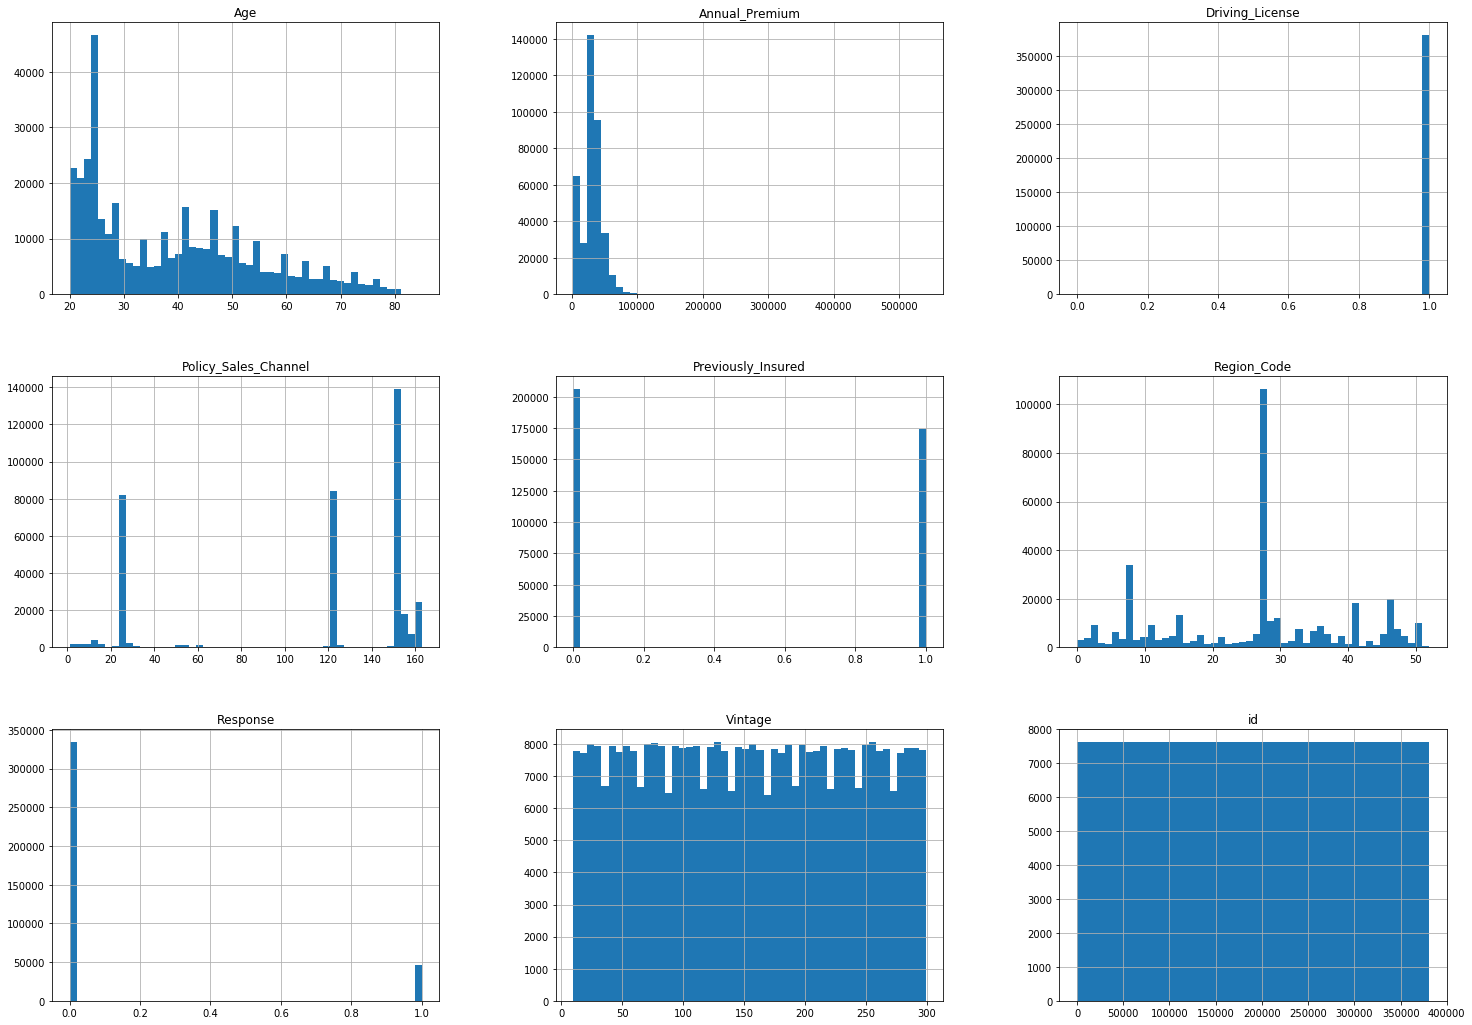

In [9]:
driving_new.hist(bins=50, figsize=(25,18))
plt.show()

This plot shows the histogram of every numerical features in the datset. As we can see here from the plot that the for feature "Previously Insured" customer who doesn't has vehicle insurance are more than who has it.Similarly, We can see it for feature "Driving License", most of the customer have driving license.In the plot above X axis shows the features values and Y axis shows the count per value.

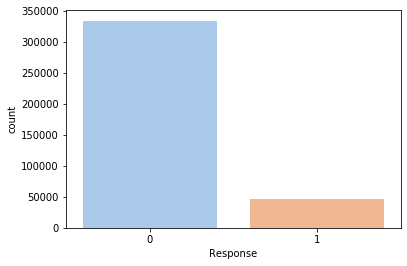

In [10]:
sns.countplot(driving_new['Response'], palette="pastel")

The countplot of the Target feature "Response" shows that most of the customer are not interested in the new vehicle insurance of the company.

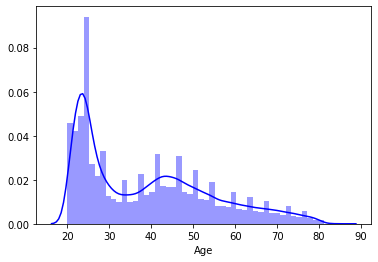

In [11]:
sns.distplot(driving_new['Age'],color='blue')

The distplot of feature "Age" shows how customer of different age is distrubed in the dataset. As we can see that first the graph increases and achieve it's maximum value and then falls sharply then, there is gradual increase happen. After that is decreases gradually.

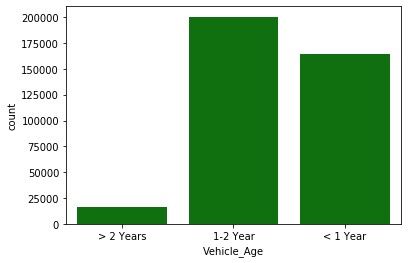

In [12]:
sns.countplot(driving_new['Vehicle_Age'], color='green')

This countplot of the feature "Vehicle_Age" has three values namely - "1-2 year", "<1 year" and ">2 Years". As we can see the most of the customer's vehicle age falls under the category 1-2 Year whereas, very few vehicle's age are more than 2 years.

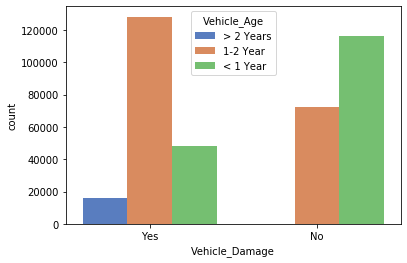

In [13]:
sns.countplot(driving_new['Vehicle_Damage'], hue=driving_new['Vehicle_Age'], palette='muted')

This countplot of features "Vehicle_Damage" and "Vehicle_Age", where "Vehicle_Damage" is data which is shown in plot whereas "Vehicle_Age" used in hue is just for color encoding. This plot shows most of the vehicle which are damaged their age is between 1 to 2 years. Similarly Vehicle which are not damaged mostly their age is less than a year.

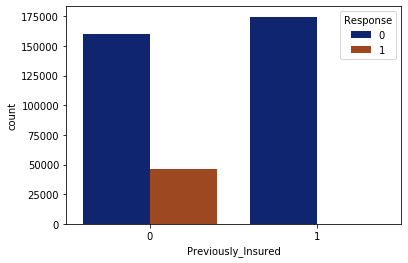

In [14]:
sns.countplot(driving_new['Previously_Insured'], hue=driving_new['Response'], palette='dark')

This countplot of features "Previously_Insured" and "Response", where "Previously_Insured" is data which is shown in plot whereas "Response" used in hue is just for color encoding. This plot shows that there are few customer who doesn't have vehicle insurance already are interested in company new vehicle insurance.

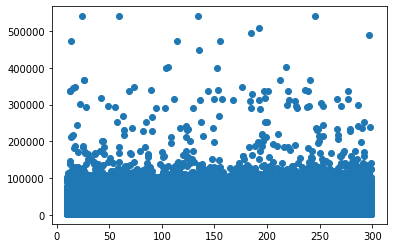

In [15]:
plt.scatter(driving_new['Vintage'], driving_new['Annual_Premium'])

This scatter plot of two features "Vintage" on X-axis and "Annual_Premium" on Y-axis shows how the values of Annual_Premium scattered with respect to the Vintage.

In [16]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001962780EBC8>,
      dtype=object)

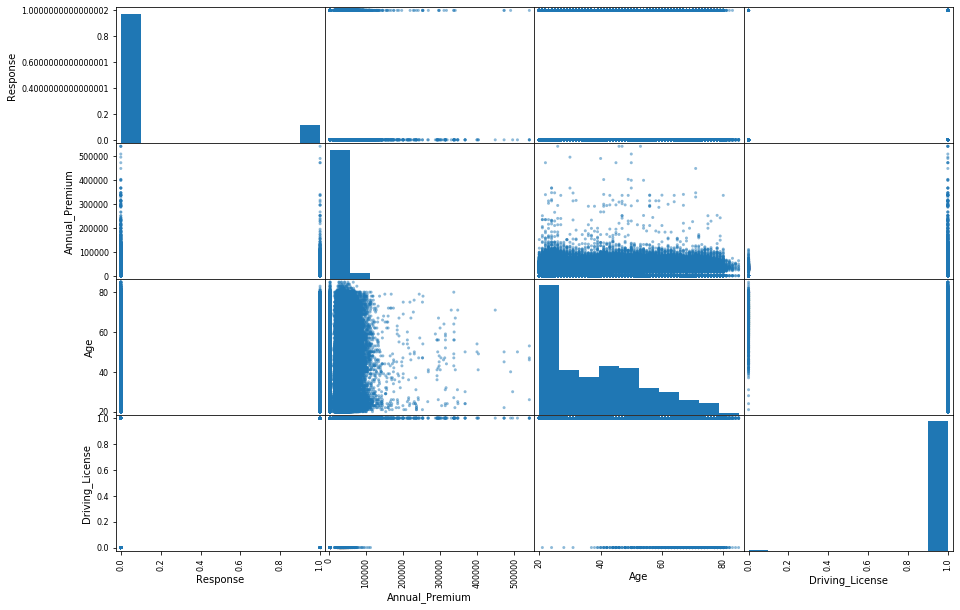

In [17]:
features = ["Response","Annual_Premium","Age","Driving_License"]
scatter_matrix(driving_new[features], figsize=(15,10))

As we can see that here too from this scatter matrix plot. As the response value is either 0 or 1.Thers is positive correlation between Response and age compare to other features.

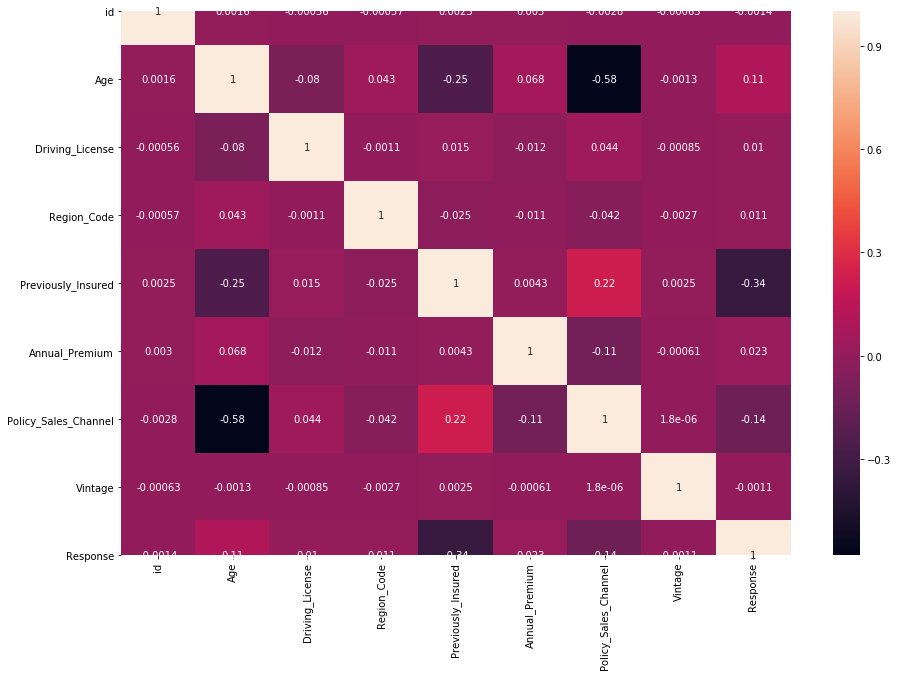

In [18]:
plt.figure(figsize=(15, 10))
cor = sns.heatmap(driving_new.corr(), annot=True)


We can see here the correlation amongst all the numerical features with each other though heatmap.Each feature shows corrleation 1 with itself which is true.

### Preprocessing

Now, "Region_Code" and "Vintage" columns are not helping much as we can see from the correlation value with the target feature. So, I'll drop these columns first and then transform the three categorical variables into one hot vectors by One hot encoding.

In [22]:
driving_new = driving_new.drop(["Region_Code", "Vintage"], axis=1)

In [24]:
driving_new.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Response                0
dtype: int64

As we can see here there are no missing values in any features. So, I do not have to worry about filling the missing values.

In [25]:
driving_new["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

I will do "One Hot encoding" on "Vehicle_Age" too because this column have only three difeerent values as we can see from the above results.

In [26]:
driving_cat = driving_new[["Gender", "Vehicle_Age","Vehicle_Damage"]]

In [27]:
driving_num = driving_new[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel","Previously_Insured"]]

In [28]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
driving_cat_OH = encoder.fit_transform(driving_cat)
driving_cat_OH

<381109x7 sparse matrix of type '<class 'numpy.float64'>'
	with 1143327 stored elements in Compressed Sparse Row format>

In [29]:
driving_cat = pd.DataFrame(driving_cat_OH.toarray())

In [30]:
driving_num = driving_num.reset_index(drop=True)

I performed the reset_index everywhere because to match the index number with other dataframes. So, that there will be no extra instaces of data is created during concatenation of dataframes. I'll do this for few more times in this assignment. The reason will be the same for all of them.

In [31]:
drive = [driving_cat, driving_num]
Xd = pd.concat(drive,axis=1).reset_index(drop=True)
yd = driving_new[["Response"]]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(Xd,yd, test_size=0.25, random_state=42)

I splitted the dataset into train and test set. Test size is 25 percent of the total data.

In [33]:
X_train_num=X_train[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel","Previously_Insured"]]
X_train_cat=X_train[[0,1,2,3,4,5,6]]
X_test_num=X_test[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel","Previously_Insured"]]
X_test_cat=X_test[[0,1,2,3,4,5,6]]

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled = scale.fit_transform(X_train_num)
print(scaled)

[[0.04074897 0.01538462 1.         0.93209877 1.        ]
 [0.46364051 0.84615385 1.         0.75925926 1.        ]
 [0.1245891  0.47692308 1.         0.75925926 0.        ]
 ...
 [0.0301878  0.03076923 1.         0.93209877 0.        ]
 [0.         0.36923077 1.         0.95679012 1.        ]
 [0.04113407 0.10769231 1.         0.93209877 0.        ]]


In [35]:
X_train_num = pd.DataFrame(scaled, columns = X_train_num.columns)

In [36]:
X_train_cat = X_train_cat.reset_index(drop=True)


In [37]:
train = [X_train_num, X_train_cat]
X_train= pd.concat(train, axis=1)
X_train.shape

(285831, 12)

In [38]:
scal = MinMaxScaler()
scaleed = scal.fit_transform(X_test_num)
print(scaleed)

[[0.0330732  0.01538462 1.         0.98148148 1.        ]
 [0.06486647 0.53846154 1.         0.15432099 0.        ]
 [0.         0.32307692 1.         0.15432099 0.        ]
 ...
 [0.07473002 0.03076923 1.         0.93209877 0.        ]
 [0.06386561 0.10769231 1.         0.93209877 1.        ]
 [0.13177747 0.47692308 1.         0.75925926 0.        ]]


In [39]:
X_test_num = pd.DataFrame(scaleed, columns = X_test_num.columns)

In [40]:
X_test_cat = X_test_cat.reset_index(drop=True)


In [41]:
test = [X_test_num, X_test_cat]
X_test= pd.concat(test, axis=1)
X_test.shape

(95278, 12)

The normalization of data is very important for this dataset. Because the numerical features have different scales and also because machine learning algorithms don't perform well when the data numerical features have very different scales. I used "MinMax" scaling because it normalise the scales between 0 and 1. Since our target variable is also either 0 or 1, this scaling is fit for our purpose.

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Review

#### Least Squares
The method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear model. It calculates the distance from the line to a given data point by subtracting one from the other. It takes the square of the difference so that the predicted values below the actual values do not cancel out with those above the actual values.

The Least Squares model is the closed form solution for linear regression where the error function can be expressed as following 

\begin{equation}
\frac{1}{2}\sum_{n=1}^{N}(h_w(X^i) - y^i)^2 =\frac{1}{2}(XW - Y)^T (XW - Y)
\end{equation}

on taking the derivative of the Error function wrt to $W$ and solving we get the closed for equation as

\begin{equation}
W = (X^T.X)^{-1}X^TY
\end{equation}

The $(X^T.X)^{-1}$ term is usually the pseudo-inverse.

The complexity of each operations are as follows

$(X^T.X) = O(M^2N)$

$(X^T.X)^{-1} = O(M^3) \hspace{2cm}(using \ LU \ decomposition)$

$X^TY = O(MN)$

where $N$ is the number of samples and $M$ is the number of predictors/features.

Closed form solutions thus should not be used as it is more computationally expensive and generally tend to overfit the dataset.

#### Least Mean Squares
The method of Least Mean Squares minimizes the mean of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear model. It calculates the distance from the line to a given data point by subtracting one from the other. It takes mean of the "square of the difference" so that the predicted values below the actual values do not cancel out with those above the actual values.


\begin{equation}
h_w(X) = \sum_{i=0}^{n} W_iX_i   \\  n = features
\end{equation}

The cost function thus can be expressed as 
\begin{equation}
J(W) = \frac{1}{2}\sum_{i=0}^{m} (h_w(X)^i - Y^i)^2   \\  m = samples
\end{equation}

The gradient can be calculated by taking partial derivative wrt $W$ 
\begin{equation}
\delta J(X) = \sum_{i=0}^{m} (h_w(X)^i - Y^i) \cdot Xi   \\  m = samples
\end{equation}

<b> Batch Gradient Descent </b>

1. In batch gradient descent we use all the samples to update weights and cost-function 

```
Repeat until convergence {
```
\begin{equation}W_j = W_j - \alpha(h_x(X) - Y^T).X_j\end{equation}
```
}
```




<b> Stochastic Gradient Descent </b>

```
Loop {
    for i=1:m {
```
   \begin{equation}W_j = W_j - \alpha(h_x(X) - Y^T).X_j \hspace{2cm} for \ \ \  every \ \ \  j\end{equation}
```

    }
}
```

### Implementation and Explanation of Codes

### Super Classs Definition

In [42]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

In the code shell above there is one super class with two abstract function train and use. Train is used for training the model and use for to test the model. After that there is another class name Linear Model which is abstract class for Linear model. There are few function defined , __init__ which initializes the weight vector with None value, _check_matrix is the function for checking if it the matrix is 2D otherwise it will raise an error, add_ones is a function for adding one zeroth column with value 1.

### Least Squares

In [43]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T)[0]
        self.w = self.w.T
        return self.w
    # apply the learned model to data X
    def use(self, X):
        X = self.add_ones(X)
        res = self.w@X.T
        return res.T

This Class LinearRegress is implemention of Least Sqaures method. In this class first I defined the main function which is __init__. Then I defined the train function inside which X and T is passed(feature vector's as matrix and Target output as input variables repectively). After that, I appended bias of 1's to the input feature vector X. I update the weight vector w using the normal equation(mentioned below), then took a transpose of the weight vector and return the weight vector. Lastly, I defined the use function to apply the learned model to data x.Inside it X is passed similar as explained above.I appended bias of 1's to the input feature vector X here as well and then calculate the dot product of transpose X and weight Vector w, stored in res variable and return the transpose of it.

Normal Equation - \begin{equation}
W = (X^T.X)^{-1}X^TY
\end{equation}


### Least Mean Squares

In [44]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
                
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
            x= x.reshape(1, x.size)
            x1 = self.add_ones(x)
            t = t.reshape(t.size, 1)
            if self.w is None:
                self.w = np.zeros((x1.shape[1],1))   
            gradients = (x1@self.w - t)*x1.T
            self.w = self.w- self.alpha * gradients
            
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)),X))
        res1= X1 @ self.w 
        return res1

The class LMS is implementation  of Least Mean Squares.There are few functions defined in the class. First one is __init__ method.
Inside the  train function X and T is passed(feature vector's as matrix and Target output as input variables repectively).It is iterating through the data and calling train_step function recursively inside it to update the weight vector w sequentialy. After that, In train_step first making the x vector into 2d matrix according to the condition of Super class check_matrix function, and then for t as well. After that, I appended bias of 1's to the input feature vector X. After that it is checking if self.w is None then add zeros to self.w array, otherwise It calculates the gradients(by taking dot product of x1 feature vector and weight vector w and then subtracting the target variable from it.After that I multiolied it by transpose of x1 feature vector) and weight vector(by subtracting the multiplication of learning rate alpha and gradients from weight vector w) Lastly, use function is for apply the LMS model which I trained, over the data X.In this use function X is passed(feature vector's as matrix).I appended bias of 1's to the input feature vector X here as well and then calculated the dot product of X1 and weight Vector w, stored in res1 variable and returned the res1.

### Usage Examples

In [45]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ashes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


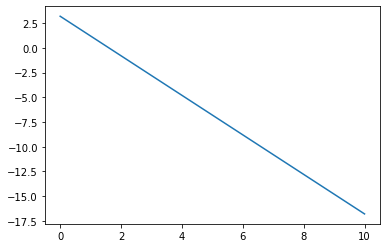

In [46]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

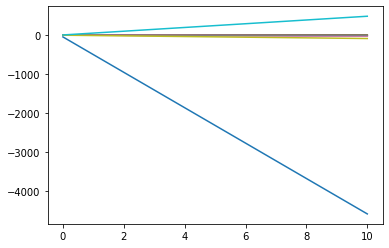

In [47]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

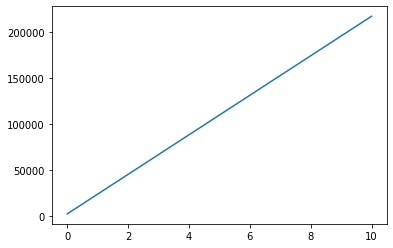

In [48]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


As I have already preprocessed my data shown above in the data section. I have also splitted my dataset into training and test data. So, I'll use the models on training data and then test it on testing data.

#### LS Experiment

#### Description, Codes

In [49]:
ls = LinearRegress()
ls.train(X_train, y_train)
y_pred = ls.use(X_test)

C:\Users\ashes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [51]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, y_pred.round())

0.8765192384390941

In [52]:
confusion_matrix(y_test, y_pred.round())

array([[83513,     0],
       [11765,     0]], dtype=int64)

First I created a object ls for LinearRegress model. Then, I trained and test the model on training data and test data respectively. After that I calculated the accuracy of the model using accuracy score and confusion matrix. The accuracy of the model is quite good which is 87.6 percent.

#### Visualizations for LS

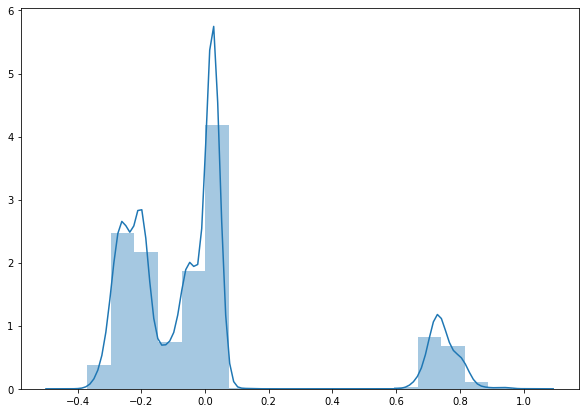

In [50]:
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot(y_test-y_pred,bins=20);

In [53]:
from numpy.polynomial.polynomial import polyfit

def bestfit(Xd,yd):
    x = np.ravel(Xd.iloc[:,0])
    y = np.ravel((yd))
    m,b = polyfit(x,y,1)
    return x,y,m,b

This function is created for the best fit line for Actual Response value and Predicted Response Value

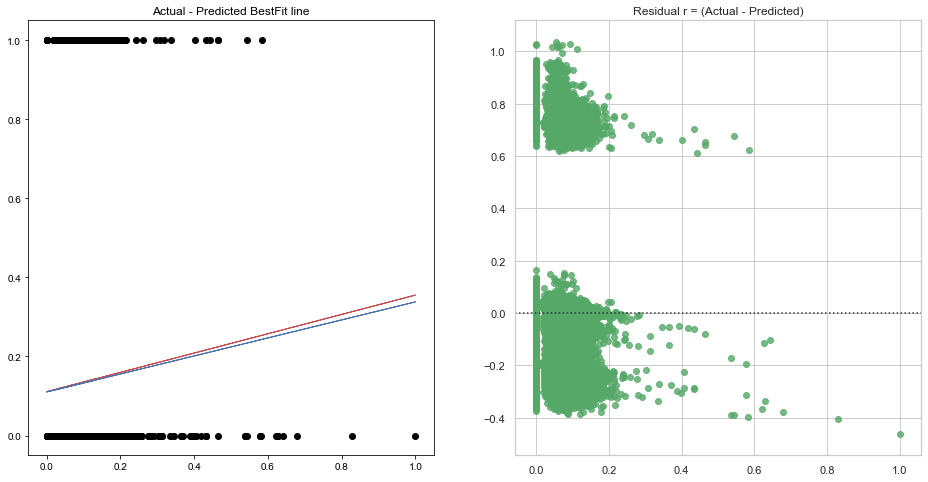

In [54]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(X_test.iloc[:,0],y_test,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(X_test,y_test)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[x,y,b,m] = bestfit(X_test,y_pred)
plt.plot(x, b + m * x, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual r = (Actual - Predicted)')
residual=(y_test - y_pred)
sns.residplot(np.array(X_test.iloc[:,0]), np.array(residual), color="g")

#### LMS Experiment

#### Description, Codes

In [55]:
lms = LMS(0.1)
for x,t in zip(X_train.values,y_train.values):
    lms.train_step(x,t)

In [56]:
y_pred1 = lms.use(X_test)

In [57]:
accuracy_score(y_test, y_pred1.round())

0.7501311950292827

In [58]:
confusion_matrix(y_test, y_pred1.round())

array([[65559, 17954],
       [ 5853,  5912]], dtype=int64)

First I created a object lms for LMS model with learning rate 0.1. Then, I trained and test the model on training data and test data respectively. After that I calculated the accuracy of the model using accuracy score and confusion matrix. The accuracy of the model is good which is 75 percent.

#### Visualization for LMS

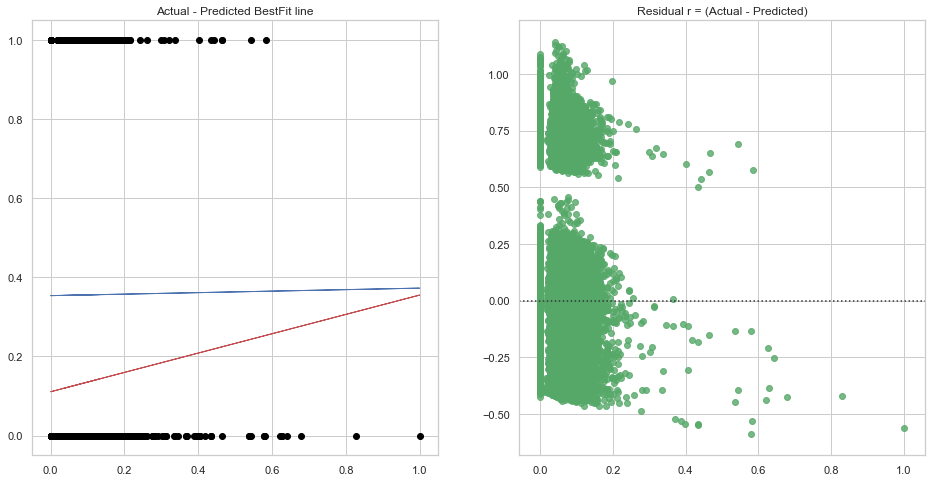

In [59]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(X_test.iloc[:,0],y_test,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(X_test,y_test)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[x,y,b,m] = bestfit(X_test,y_pred1)
plt.plot(x, b + m * x, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual r = (Actual - Predicted)')
residual=(y_test - y_pred1)
sns.residplot(np.array(X_test.iloc[:,0]), np.array(residual), color="g")

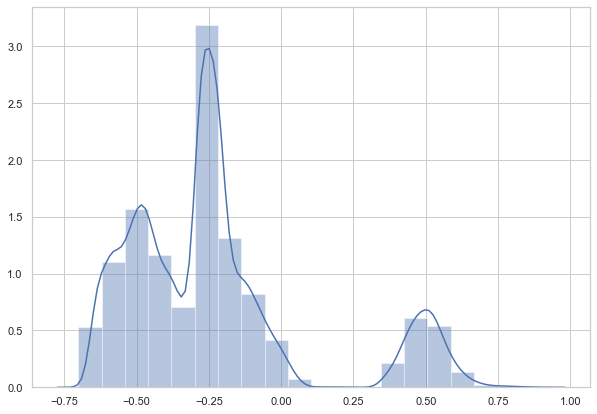

In [60]:
fig,ax=plt.subplots(figsize=(10,7))
sns.distplot((y_test-y_pred1),bins=20);

In [61]:
lms1 = LMS(0.01)
for x,t in zip(X_train.values,y_train.values):
    lms1.train_step(x,t)

In [62]:
y_pred3 = lms1.use(X_test)

In [63]:
accuracy_score(y_test, y_pred3.round())

0.8764247780180104

### Analysis/Comparison of Algorithms

#### Least Squares
The method of Least Squares minimizes the sum of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear model. It calculates the distance from the line to a given data point by subtracting one from the other. It takes the square of the difference so that the predicted values below the actual values do not cancel out with those above the actual values.

This method of regression is easy to implement because it updates the weight vector on whole data set or as a selected batch of data set just like batch gradient descent or gradient descent algorithm. It is less sensitive to outliers. It works well for small data sets. However if the data set is large it takes alot of time to converge i.e. takes time to find the optimum weight vector w.Since because the method is using normal equation for training it also have a problem of computational complexity of converting a matrix which is typically O(n^3) or O(n^2.4).

#### Least Mean Squares
The method of Least Mean Squares minimizes the mean of the squares of the residuals between the observed targets in the dataset, and the targets predicted by the linear model. It calculates the distance from the line to a given data point by subtracting one from the other. It takes mean of the "square of the difference" so that the predicted values below the actual values do not cancel out with those above the actual values.

This method of regression is little tough to implement because it iterates through the datasets calculating weight vector per instance similar like Stochastic Gradient Descent. However, it is more sensitive to the outliers. It works well for large data set as well, because it doesn't have to deal with a problem of computational complexity of converting a matrix which is typically O(n^3) or O(n^2.4). However the weight vector is not the optimal but it is good enough for the model to generalize


As we can see that the experiments performed over both the models i.e. train and test the models, few things we can infer:-
1. Accuracy of the "Least Squares" is(87) better than "Least Mean Squares" which is(75) 
2. "Least Squares" have more True Negatives than "Least Mean Squares", however "Least Mean Squares" have few True positive as well whereas "Least Squares" have zero True Positives. But in "Least Squares" there is no false positives where as "Least Mean Sqaures" have few false positives.
3. The Actual and Predicted Best fit line of Least Squares is overlapping to each other in the beginning then the distance between increased little bit.However, For Least Mean Sqaures the distance between  The Actual and Predicted Best fit line is large initially which  keeps on decreasing. 
4. Residuals i.e. error, as we can see from the residual plot and distplot how the error for Least Mean Squares is disperesed in compare to Least Sqaures.
5. Also, just to add one more thing that I checked by decreasing the learning rate alpha in LMS the accuracy increases from 74 to nearly 88.

# Conclusions

It's a pretty good assignment to learn about the basics of Least Squares and Least Mean Sqaures methods and also maths they are using. The implementation of Least Square wasn't that tough but implementation of Least Mean Sqaures gave me some hard time, but I kept trying different ways because I was updating the weight vector for whole data set insted of just particular instance. I asked questions on piazza about it and this answer "Yes, the LMS update goes in the train_step() method, while the train() method simply iterates through the data" actually gave me insight of how to solve the error. 

# References
[1]. Geron,Aurelien. "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: 2nd Edition".<br>
[2]. "https://towardsdatascience.com/linear-regression-using-least-squares-a4c3456e8570", Accessed 8th October 2020.<br>
[3]. Stackover Flow, for errors like Attribute Error, Type Error etc. Accessed 8th October 2020<br>
[4]. Ng, Andrew, "CS229 Lecture notes" Lecture Notes http://cs229.stanford.edu/notes/cs229-notes1.pdf, Accessed 6th October 2020.

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

1. The least significant features for my data is Age as we can see that removing this feature doesn't make much impact on accuracy_score.However, the previously_insured is the most significant feature in the manner that most of the customer who doesn't have insurance have responded yes that they are interested in new insurance policy.

#### Least Significant Feature

In [64]:
driving_num1 = driving_new[["Annual_Premium","Driving_License","Policy_Sales_Channel","Previously_Insured"]]

In [65]:
driving_num1 = driving_num1.reset_index(drop=True)

In [66]:
drive1 = [driving_cat, driving_num1]
Xl = pd.concat(drive1,axis=1).reset_index(drop=True)
yl = driving_new[["Response"]]

In [67]:
from sklearn.model_selection import train_test_split
X_train1, X_test1,y_train1,y_test1 = train_test_split(Xl,yl, test_size=0.25, random_state=42)


In [68]:
X_train_num1=X_train1[["Annual_Premium","Driving_License","Policy_Sales_Channel","Previously_Insured"]]
X_train_cat1=X_train1[[0,1,2,3,4,5,6]]
X_test_num1=X_test1[["Annual_Premium","Driving_License","Policy_Sales_Channel","Previously_Insured"]]
X_test_cat1=X_test1[[0,1,2,3,4,5,6]]

In [69]:
from sklearn.preprocessing import MinMaxScaler
scalee = MinMaxScaler()
scalleed = scalee.fit_transform(X_train_num1)
print(scalleed)

[[0.04074897 1.         0.93209877 1.        ]
 [0.46364051 1.         0.75925926 1.        ]
 [0.1245891  1.         0.75925926 0.        ]
 ...
 [0.0301878  1.         0.93209877 0.        ]
 [0.         1.         0.95679012 1.        ]
 [0.04113407 1.         0.93209877 0.        ]]


In [70]:
X_train_num1.shape

(285831, 4)

In [71]:
X_train_num1 = pd.DataFrame(scalleed, columns = X_train_num1.columns)

In [72]:
X_train_cat1 = X_train_cat1.reset_index(drop=True)

In [73]:
train1 = [X_train_num1, X_train_cat1]
X_train1= pd.concat(train1, axis=1)
X_train1.shape

(285831, 11)

In [74]:
sca = MinMaxScaler()
scaeed = sca.fit_transform(X_test_num1)
print(scaeed)

[[0.0330732  1.         0.98148148 1.        ]
 [0.06486647 1.         0.15432099 0.        ]
 [0.         1.         0.15432099 0.        ]
 ...
 [0.07473002 1.         0.93209877 0.        ]
 [0.06386561 1.         0.93209877 1.        ]
 [0.13177747 1.         0.75925926 0.        ]]


In [75]:
X_test_num1 = pd.DataFrame(scaeed, columns = X_test_num1.columns)

In [76]:
X_test_cat1 = X_test_cat1.reset_index(drop=True)

In [77]:
test1 = [X_test_num1, X_test_cat1]
X_test1= pd.concat(test1, axis=1)
X_test1.shape

(95278, 11)

In [78]:
lms2 = LMS(0.1)
for x,t in zip(X_train1.values,y_train1.values):
    lms2.train_step(x, t)

In [79]:
y_pr = lms2.use(X_test1)

In [80]:
accuracy_score(y_test1, y_pr.round())

0.7498897961754025

In [81]:
confusion_matrix(y_test1, y_pr.round())

array([[67284, 16229],
       [ 7601,  4164]], dtype=int64)

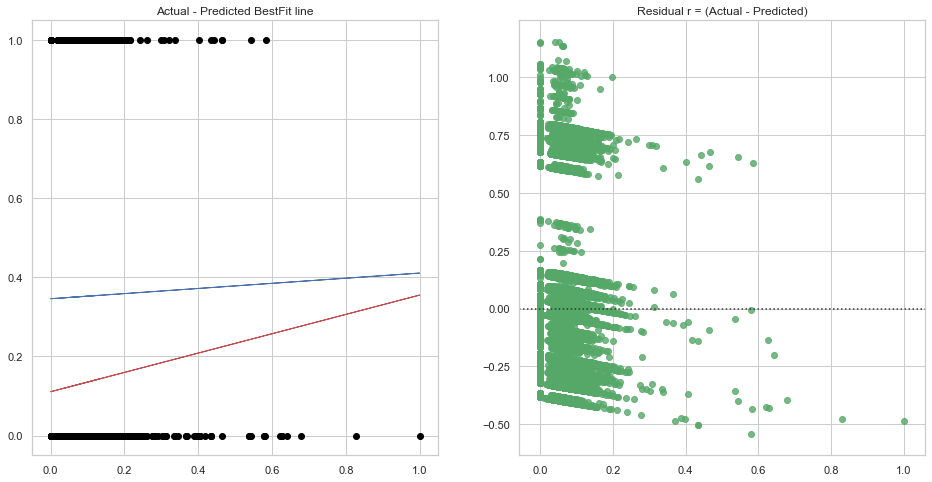

In [82]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(X_test1.iloc[:,0],y_test1,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(X_test1,y_test1)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[x,y,b,m] = bestfit(X_test1,y_pr)
plt.plot(x, b + m * x, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual r = (Actual - Predicted)')
residual=(y_test1 - y_pr)
sns.residplot(np.array(X_test1.iloc[:,0]), np.array(residual), color="g")


#### Analysis
1. The best fit line of Actual and predicted shows little deviation from the earlier.As we can see from the graph.
2. As we can that the accuracy decreases by just .01 percent, so this feature is least important as it doesn't affect the accuracy of the model
3. Also,The residual plot as we can see is deviating from the previous ones.

#### Most Significant Feature

In [83]:
driving_num2 = driving_new[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel"]]

In [84]:
driving_num2 = driving_num2.reset_index(drop=True)

In [85]:
drive2 = [driving_cat, driving_num2]
Xk = pd.concat(drive2,axis=1).reset_index(drop=True)
yk = driving_new[["Response"]]

In [86]:
from sklearn.model_selection import train_test_split
X_train2, X_test2,y_train2,y_test2 = train_test_split(Xk,yk, test_size=0.25, random_state=42)

In [87]:
X_train_num2=X_train2[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel"]]
X_train_cat2=X_train2[[0,1,2,3,4,5,6]]
X_test_num2=X_test2[["Annual_Premium","Age","Driving_License","Policy_Sales_Channel"]]
X_test_cat2=X_test2[[0,1,2,3,4,5,6]]

In [88]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scd = sc.fit_transform(X_train_num2)
print(scd)

[[0.04074897 0.01538462 1.         0.93209877]
 [0.46364051 0.84615385 1.         0.75925926]
 [0.1245891  0.47692308 1.         0.75925926]
 ...
 [0.0301878  0.03076923 1.         0.93209877]
 [0.         0.36923077 1.         0.95679012]
 [0.04113407 0.10769231 1.         0.93209877]]


In [89]:
X_train_num2.shape

(285831, 4)

In [92]:
X_train_num2 = pd.DataFrame(scd, columns = X_train_num2.columns)

In [93]:
X_train_cat2 = X_train_cat2.reset_index(drop=True)

In [94]:
train2 = [X_train_num2, X_train_cat2]
X_train2= pd.concat(train2, axis=1)
X_train2.shape

(285831, 11)

In [95]:
scad = MinMaxScaler()
scae = scad.fit_transform(X_test_num2)
print(scae)

[[0.0330732  0.01538462 1.         0.98148148]
 [0.06486647 0.53846154 1.         0.15432099]
 [0.         0.32307692 1.         0.15432099]
 ...
 [0.07473002 0.03076923 1.         0.93209877]
 [0.06386561 0.10769231 1.         0.93209877]
 [0.13177747 0.47692308 1.         0.75925926]]


In [96]:
X_test_num2 = pd.DataFrame(scae, columns = X_test_num2.columns)

In [97]:
X_test_cat2 = X_test_cat2.reset_index(drop=True)

In [98]:
test2 = [X_test_num2, X_test_cat2]
X_test2= pd.concat(test2, axis=1)
X_test2.shape

(95278, 11)

In [99]:
lms4 = LMS(0.1)
for x,t in zip(X_train2.values,y_train2.values):
    lms4.train_step(x, t)

In [100]:
y_pre = lms4.use(X_test2)

In [101]:
accuracy_score(y_test2, y_pre.round())

0.7600600348453997

In [102]:
confusion_matrix(y_test2, y_pre.round())

array([[68199, 15314],
       [ 7547,  4218]], dtype=int64)

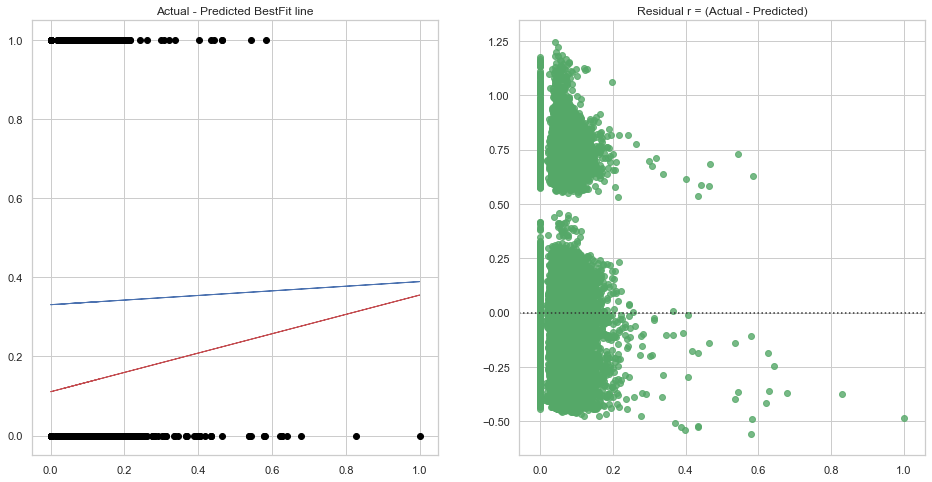

In [103]:
fig = plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Actual - Predicted BestFit line')
plt.plot(X_test2.iloc[:,0],y_test2,'o',color='black')

##ACTUAL
[x,y,b,m] = bestfit(X_test2,y_test2)
plt.plot(x, b + m * x, '-',lw=1,color='r')

##PREDICTED
[x,y,b,m] = bestfit(X_test2,y_pre)
plt.plot(x, b + m * x, '-',lw=1,color='b')

sns.set(style="whitegrid")
plt.subplot(1,2,2)
plt.title('Residual r = (Actual - Predicted)')
residual=(y_test2 - y_pre)
sns.residplot(np.array(X_test2.iloc[:,0]), np.array(residual), color="g")

#### Analysis
1. The best fit line of Actual and predicted best fit shows little deviation from the earlier.As we can see from the graph.
2. Although we can that the accuracy increases by just 1 percent but if we can see that the number of false negatives also increases and also there is significant decrease in the True Positive.If we can refer to Geron book it is explained that even if the accuracy of the model increases  it doesn't mean that it became a good model now, we have to look for False negatives and false positives as well.
3. Accuracy score increases because  this "Previosuly Insured" feature, whoever doesn't have the insurance previously have responded to yes for the new one. And the amount of person who doesn't have insurance is very less than who has it. So, Now when we removed it from our training data, the accuracy went up.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [107]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    model.w = np.zeros((X.shape[1]+1, T.shape[1]))
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


C:\Users\ashes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
